In [13]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = housing.target

In [15]:
print("=== データセットの基本情報 ===")
print("特徴量の形状:", X.shape)
print("ターゲットの形状:", y.shape)
print("\n特徴量の説明:")
for name, description in zip(housing.feature_names, housing.feature_names):
    print(f"- {name}: {description}")

=== データセットの基本情報 ===
特徴量の形状: (20640, 8)
ターゲットの形状: (20640,)

特徴量の説明:
- MedInc: MedInc
- HouseAge: HouseAge
- AveRooms: AveRooms
- AveBedrms: AveBedrms
- Population: Population
- AveOccup: AveOccup
- Latitude: Latitude
- Longitude: Longitude


In [16]:
# データの前処理
# 標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [17]:
# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [18]:
# モデルの構築と学習
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [19]:
# 予測
y_pred = model.predict(X_test)

In [20]:
# モデルの評価
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n=== モデルの評価 ===")
print(f"平均二乗誤差 (MSE): {mse:.4f}")
print(f"平方根平均二乗誤差 (RMSE): {rmse:.4f}")
print(f"決定係数 (R²): {r2:.4f}")


=== モデルの評価 ===
平均二乗誤差 (MSE): 0.5559
平方根平均二乗誤差 (RMSE): 0.7456
決定係数 (R²): 0.5758


In [21]:
# 係数の確認
coefficients = pd.DataFrame({
    '特徴量': X.columns,
    '係数': model.coef_
})
print("\n=== 特徴量の係数 ===")
print(coefficients.sort_values(by='係数', ascending=False))



=== 特徴量の係数 ===
          特徴量        係数
0      MedInc  0.852382
3   AveBedrms  0.371132
1    HouseAge  0.122382
4  Population -0.002298
5    AveOccup -0.036624
2    AveRooms -0.305116
7   Longitude -0.868927
6    Latitude -0.896635


/home/temmie0232/notebook/python/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 27531 (\N{CJK UNIFIED IDEOGRAPH-6B8B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/temmie0232/notebook/python/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24046 (\N{CJK UNIFIED IDEOGRAPH-5DEE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/temmie0232/notebook/python/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12503 (\N{KATAKANA LETTER PU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/temmie0232/notebook/python/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12525 (\N{KATAKANA LETTER RO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/temmie0232/notebook/python/venv/lib/python3.12/site-packages/IPython/core/pyla

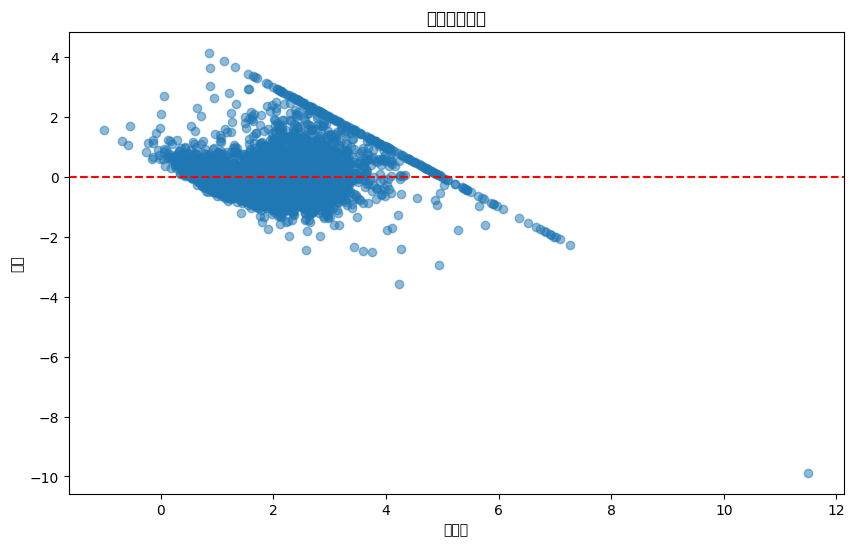

In [22]:
# 残差プロット
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, y_test - y_pred, alpha=0.5)
plt.xlabel('予測値')
plt.ylabel('残差')
plt.title('残差プロット')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

/home/temmie0232/notebook/python/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 23455 (\N{CJK UNIFIED IDEOGRAPH-5B9F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


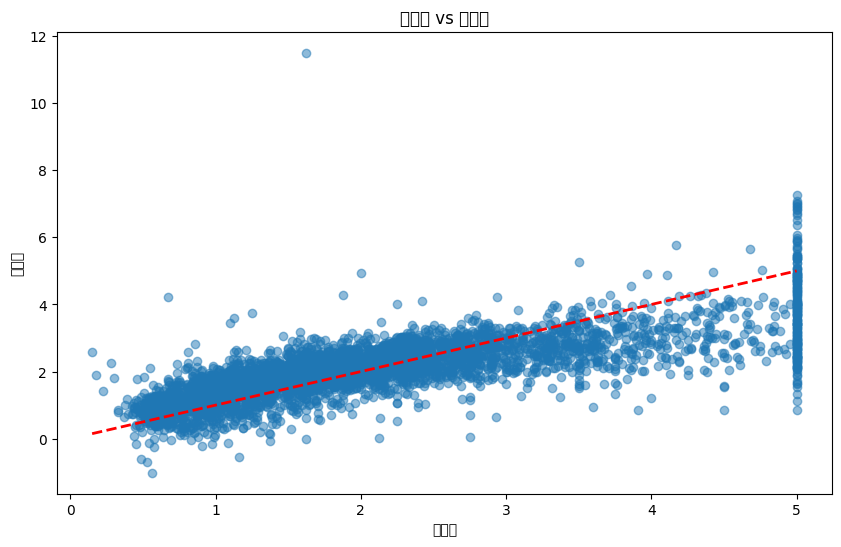

In [23]:
# 実測値と予測値の散布図
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('実測値')
plt.ylabel('予測値')
plt.title('実測値 vs 予測値')
plt.show()

/home/temmie0232/notebook/python/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/temmie0232/notebook/python/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24500 (\N{CJK UNIFIED IDEOGRAPH-5FB4}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/temmie0232/notebook/python/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/temmie0232/notebook/python/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/temmie0232/notebook/python/venv/lib/python3.12/site-packages/IPython/c

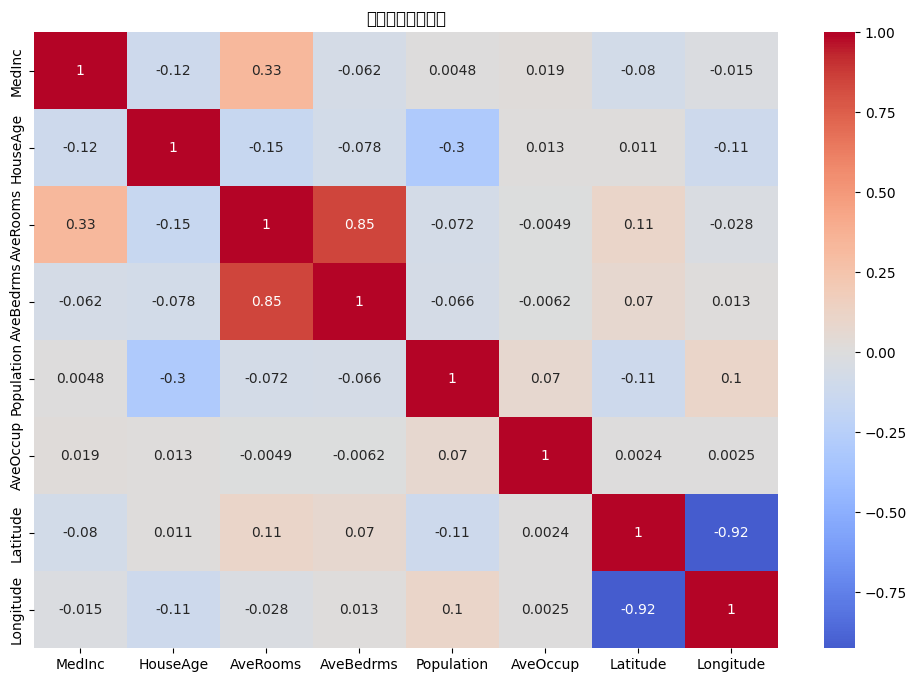

In [24]:
# 特徴量の相関行列のヒートマップ
plt.figure(figsize=(12, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('特徴量の相関行列')
plt.show()